In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
## 데이터베이스 커넥션 만들기> 커서만들기> SQL 실행
def selData(whr=''):
    dbname="user.db"
    with sqlite3.connect(dbname) as conn: # DB connection
        curr=conn.cursor() # cursor 생성
        sql='select * from user '+whr+'order by user asc'
        res=curr.execute(sql) # SQL 실행
        data=res.fetchall()# 데이터 가져오기
    return data
selData()

[('a45364532', 'female', 51, 0, None, None, '2018-06-11'),
 ('a45364532', 'female', 51, 1, 'dent', 'rear', '2018-05-20'),
 ('a45364532', 'female', 51, 1, 'glb', 'rear', '2018-09-10'),
 ('a45364532', 'female', 51, 1, 'crash', 'side', '2019-01-04'),
 ('a45364532', 'female', 51, 0, None, None, '2019-08-11'),
 ('a45364532', 'female', 51, 0, None, None, '2019-11-10'),
 ('a45364532', 'female', 51, 0, None, None, '2019-12-19'),
 ('a45364532', 'female', 51, 0, None, None, '2020-01-20'),
 ('a45364532', 'female', 51, 0, None, None, '2020-02-16'),
 ('a45364532', 'female', 51, 0, None, None, '2020-03-11'),
 ('a45364532', 'female', 51, 0, None, None, '2020-03-14'),
 ('a45364532', 'female', 51, 0, None, None, '2020-06-22'),
 ('a45364532', 'female', 51, 0, None, None, '2020-06-29'),
 ('a45364532', 'female', 51, 0, None, None, '2020-08-19'),
 ('a45364532', 'female', 51, 0, None, None, '2020-10-04'),
 ('a45364532', 'female', 51, 0, None, None, '2020-12-08'),
 ('a45364532', 'female', 51, 0, None, None, 

In [3]:
def insData(indata=[]):
    cols='user,gender,old,Dmged,How,Whr,time' 
    vals='?,?,?,?,?,?,?'
    dbname="user.db"
    with sqlite3.connect(dbname) as conn: # DB connection
        curr=conn.cursor() # cursor 생성
        #insert into 테이블명 (컬럼명) values(값들)
        sql='insert into user ('+cols+') values('+vals+')'
        res=curr.execute(sql,indata) # SQL 실행
    return res

In [463]:
import time

now =time.strftime('%Y-%m-%d',time.localtime(time.time()))


i=['y65765754','female',25,0,'dent','front',now]
insData(i)

In [17]:
import matplotlib.pyplot as plt

dbname="user.db"
with sqlite3.connect(dbname) as conn: # DB connection
    curr=conn.cursor() # cursor 생성
    sql='select * from user order by user asc'
    res=curr.execute(sql) # SQL 실행
    data=res.fetchall()# 데이터 가져오기
    
    user=[]
    dmgcnt=[]
    usecnt=[]
    gender=[]
    age=[]
    
    for i in range(len(data)):
        if data[i][0] not in user :
            user.append(data[i][0])
    print(user)
    
    
    for i in range(len(user)):
        k = user[i]
        res=selData(' where user="'+k+'"')

        d_cnt=0
        u_cnt=0
        
        for j in range(len(res)):
            if res[j][3]==1: 
                d_cnt+=1
                u_cnt+=1
            else:
                u_cnt+=1
        
        gender.append(res[j][1])
        age.append(res[j][2])        
                
        dmgcnt.append(d_cnt)
        usecnt.append(u_cnt)
        
        
    print(gender)
    print(age)
    print(dmgcnt)
    print(usecnt)
    
s=[]
for i in range(len(usecnt)):
    s.append((dmgcnt[i]/usecnt[i]))
    
# 각 사용자에 따른 위험한 사용자, 안전한 사용자 구분 척도 비교
for i in range(len(gender)):
    print(gender[i]+','+str(age[i])+','+str(dmgcnt[i])+','+str(s[i]))

['a45364532', 'd26432415', 'd45673654', 'f65325435', 'g23424325', 'g53432453', 'h76576456', 'i45364253', 'j34235632', 'k23452342', 'k30942395', 'o20394956', 'p45324564', 'p78654654', 's02342945', 's14236543', 's40275314', 't54362745', 'u53425463', 'u76545678', 'y65765754']
['female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'female']
[51, 45, 26, 22, 34, 32, 31, 23, 27, 53, 41, 35, 25, 28, 29, 38, 26, 43, 33, 40, 25]
[3, 2, 3, 8, 14, 1, 4, 14, 3, 13, 1, 2, 8, 19, 0, 2, 6, 1, 10, 1, 20]
[17, 3, 4, 11, 18, 3, 5, 19, 13, 14, 6, 8, 13, 22, 5, 4, 6, 5, 14, 13, 21]
female,51,3,0.17647058823529413
female,45,2,0.6666666666666666
male,26,3,0.75
male,22,8,0.7272727272727273
male,34,14,0.7777777777777778
male,32,1,0.3333333333333333
male,31,4,0.8
male,23,14,0.7368421052631579
female,27,3,0.23076923076923078
male,53,13,0.9285714285714286
male,41,1,0.16666666666666666
male,35,2,0.25


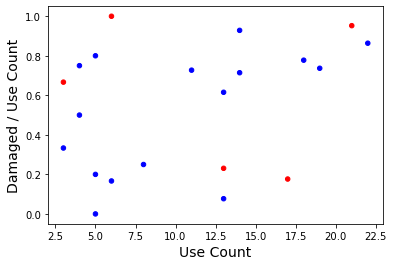

In [43]:
# 성별 구분

color=[]

for i in range(len(gender)):
    if gender[i]=='male':
        color.append('b')
    else :
        color.append('r')
        

plt.scatter(usecnt, 
            s,
           c=color,
           s=20
           )


plt.xlabel('Use Count', fontsize=14)

plt.ylabel('Damaged / Use Count', fontsize=14)

plt.show()




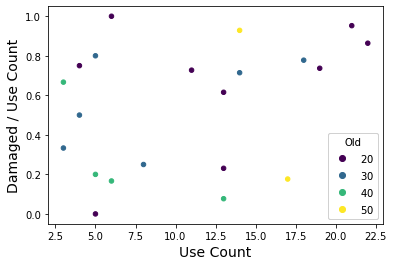

In [40]:
# 나이 구분

color=[]

for i in range(len(age)):
#     20대
    if age[i]>=20 and age[i]<30:
        color.append(20)
    elif age[i]>=30 and age[i]<40:
        color.append(30)
    elif age[i]>=40 and age[i]<50:
        color.append(40)
    else:
        color.append(50)
                
fig, ax = plt.subplots() 

scatter=ax.scatter(usecnt, 
            s,
           c=color,
           s=20,
           label=color)


legend1 = ax.legend(*scatter.legend_elements(), title="Old")
ax.add_artist(legend1)


plt.xlabel('Use Count', fontsize=14)

plt.ylabel('Damaged / Use Count', fontsize=14)

plt.show()




In [9]:
k='j34235632'
res=selData(' where user="'+k+'"')

print('사용자 id: '+k)
for i in range(len(res)):
    if res[i][3]==1:
        print(res[i][6]+', '+'파손 유형: '+res[i][4]+', 파손 위치: '+res[i][5])
    else:
        print(res[i][6]+', 무사고')

사용자 id: j34235632
2016-02-12, 무사고
2016-08-03, 파손 유형: crash, 파손 위치: front
2017-04-11, 파손 유형: crash, 파손 위치: rear
2017-07-05, 파손 유형: crash, 파손 위치: rear
2017-08-10, 무사고
2018-11-19, 무사고
2018-11-21, 무사고
2019-02-10, 무사고
2019-04-08, 무사고
2019-09-06, 무사고
2020-05-01, 무사고
2020-09-27, 무사고
2020-11-26, 무사고
